In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1.1



## Assignment

Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:
1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).
3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... but before judging, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution.

## 1.1.1

When generating random numbers for Monte Carlo simulations, the sequence of random numbers produced by the generator is typically correlated. This can lead to a biased estimate of the statistical properties of the simulated system. By using the blocking method, the data is split into blocks, and the statistical properties of the data within each block are estimated.
The estimate of the properties of the entire data set is then obtained by averaging the estimates obtained from the individual blocks.

In addition to this, once the averages within a single block are computed, say $<A_i>$, those could be considered i.i.d. random variables and therefore by the use of CLT it is possible to reduce uncertainty by adding an additional block due to:

 $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

Using `main.cpp` and the random generator dowloaded from NSL `random.cpp`, I generate $N=100$ blocks each containg $L=1000$ random variables, adding up to a total of $M=1000000$ throws.


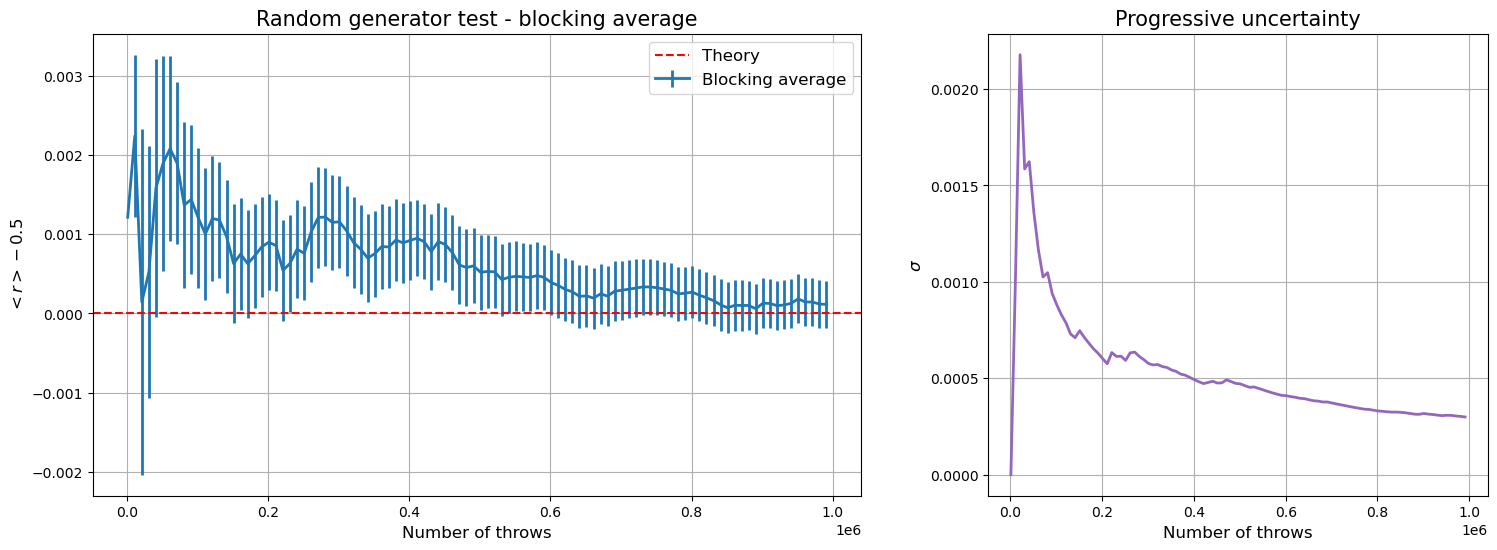

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file '1.1/1.1.1.txt', using columns 0 and 1
data = np.loadtxt('1.1/1.1.1.txt', usecols=(0, 1))

# Extract the first column of data as 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column of data as 'progressive_error'
progressive_error = data[:, 1]

# Generate an array 'x' with values ranging from 1000 to 1000000 in steps of 10000
x = np.arange(1000, 1001000, 10000)

# Create a figure with 2 subplots, using width ratios of [2, 1.3] for the subplots
fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [2, 1.3]}, figsize=(18,6))

# Plot data in the first subplot
axs[0].errorbar(x, progressive_average-0.5, yerr=progressive_error,lw=2, label='Blocking average', c='tab:blue')
axs[0].grid(True)  # Add grid lines to the plot
axs[0].axhline(0, ls='--', c='red', label='Theory')  # Add a horizontal line at y=0 in red
axs[0].set_xlabel('Number of throws', fontsize=12)
axs[0].set_ylabel('$<r>-0.5$', fontsize=12)
axs[0].legend(fontsize=12)  # Add a legend to the plot
axs[0].set_title('Random generator test - blocking average', fontsize=15)

# Plot data in the second subplot
axs[1].plot(x, progressive_error,lw=2, c='tab:purple')
axs[1].grid(True)  # Add grid lines to the plot
axs[1].set_xlabel('Number of throws', fontsize=12)
axs[1].set_ylabel('$\sigma$', fontsize=12)
axs[1].set_title('Progressive uncertainty', fontsize=15)

# Show the plot
plt.show()

## 1.1.2

This time, instead of considering the average, I consider the uncertainty:
$$\sigma^2=(r-0.5)^2$$
The rest is equivalent to the previous exercise.

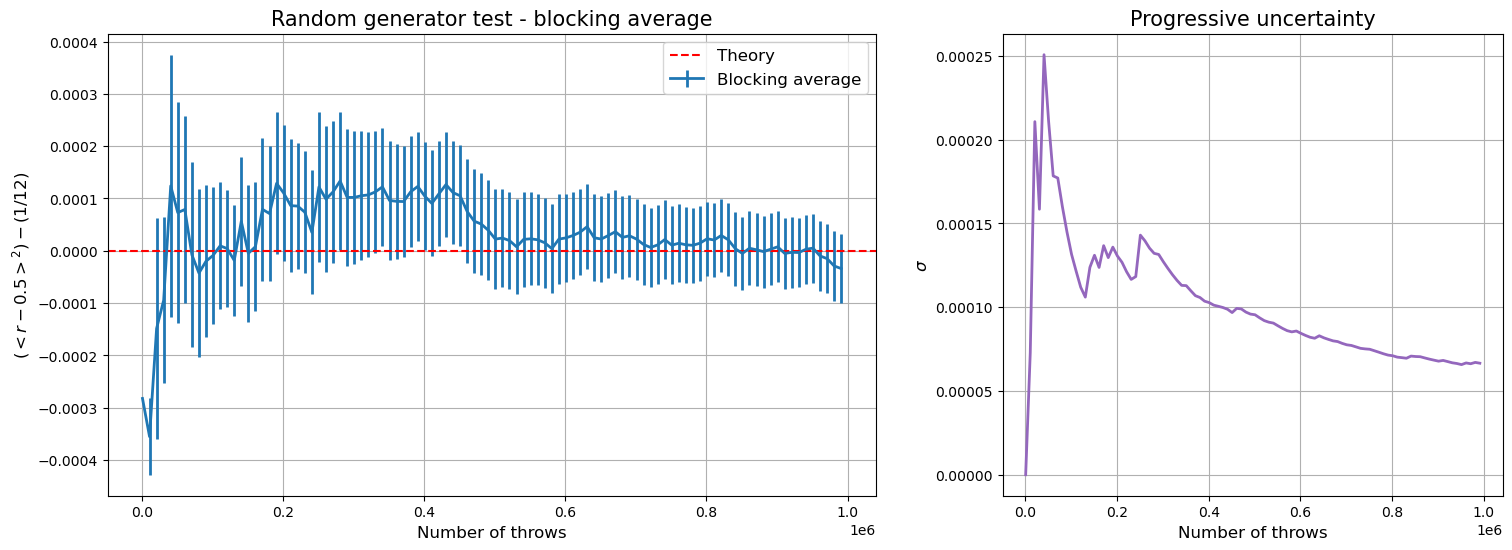

In [3]:
# Load the data from the file '1.1/1.1.2.txt' and extract the first two columns
data = np.loadtxt('1.1/1.1.2.txt', usecols=(0,1))

# Extract the first column from the data and store it in the variable 'progressive_average'
progressive_average = data[:, 0]

# Extract the second column from the data and store it in the variable 'progressive_error'
progressive_error = data[:,1]

# Create an array 'x' with values ranging from 1000 to 1000000 with a step of 10000
x=np.arange(1000,1001000, 10000)

# Create a figure with two subplots, with the second subplot being 1.3 times narrower than the first one
fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [2, 1.3]}, figsize=(18,6))

# Plot the first subplot with errorbars. 
axs[0].errorbar(x, progressive_average-(1/12), yerr=progressive_error,lw=2, label='Blocking average', c='tab:blue')
axs[0].grid(True)
axs[0].axhline(0, ls='--', c='red', label='Theory')
axs[0].set_xlabel('Number of throws', fontsize=12)
axs[0].set_ylabel('$(<r-0.5>^2)-(1/12)$', fontsize=12)
axs[0].legend(fontsize=12)
axs[0].set_title('Random generator test - blocking average', fontsize=15)

# Plot the second subplot with a line plot. The x-values are the array 'x', and the y-values are 'progressive_error'.
axs[1].plot(x, progressive_error,lw=2, c='tab:purple')
axs[1].grid(True)
axs[1].set_xlabel('Number of throws', fontsize=12)
axs[1].set_ylabel('$\sigma$', fontsize=12)
axs[1].set_title('Progressive uncertainty', fontsize=15)

# Display the plot
plt.show()


## 1.1.3

I divided the interval $[0,1)$ into M=100 bins. I then throw n=10000 random variables $\sim[0,1)$ and compute $\chi^2$ according to the previous formula. Lastly, I repeat the routine for 100 times so that I have a statistics of 100 $\chi^2$ variables.

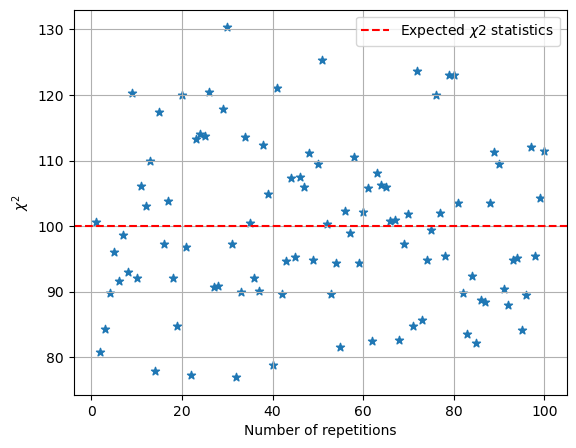

In [4]:
from scipy.optimize import curve_fit
from scipy.stats import chi2
chi2_data = np.loadtxt('1.1/1.1.3.txt')
x = np. arange(1, 101)

plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)

plt.scatter(x, chi2_data, marker='*')
plt.axhline(100, ls='--', c='red', label='Expected $\chi2$ statistics')
plt.grid(True)
plt.xlabel('Number of repetitions')
plt.ylabel('$\chi^2$')

plt.legend()
plt.show()

## Extra

In order to make sure that the fluctuations of the previous plot are contemplated by the $\chi^2$ pdf, I did the same exercise with 10000 repetitions and fitted the resulting $\chi^2$ histogram with the $\chi^2$ pdf. Then, I computed the pvalue for 99 degrees of fredom.

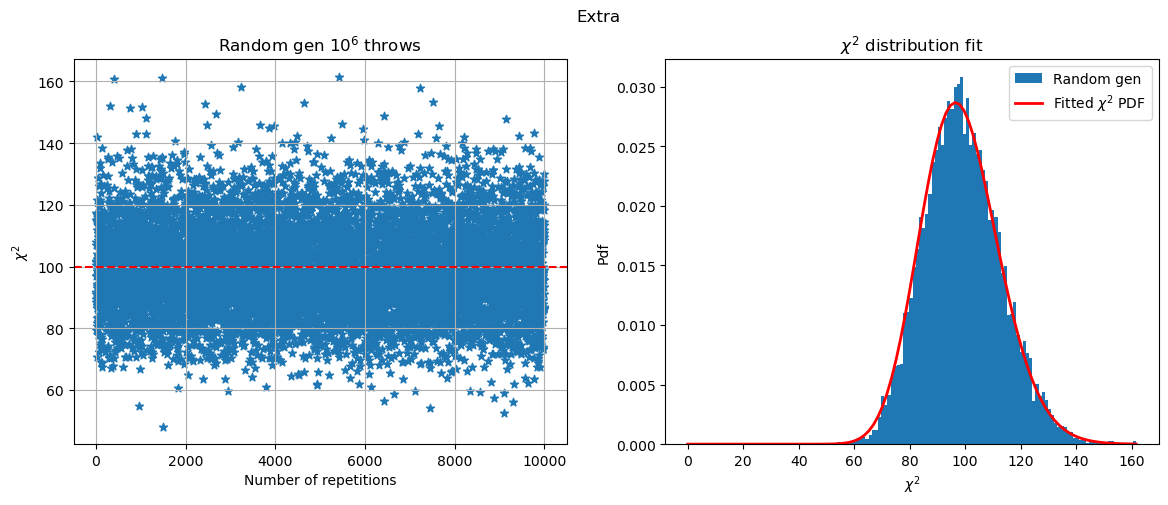

In [5]:
chi2_data = np.loadtxt('./1.1/1.1.3_extra.txt')
x = np. arange(1, 10001)

fig=plt.figure(figsize=(14, 5))
fig.suptitle('Extra')
ax = plt.subplot(1, 2, 1)

plt.scatter(x, chi2_data, marker='*')
plt.axhline(100, ls='--', c='red')
plt.grid(True)
plt.xlabel('Number of repetitions')
plt.ylabel('$\chi^2$')
plt.title('Random gen $10^6$ throws')

ax = plt.subplot(1, 2, 2)

hist, bins = np.histogram(chi2_data, bins=100, density=True)

# Fit the chi-squared distribution to the histogram
popt, pcov = curve_fit(chi2.pdf, bins[:-1], hist, p0=99)

# Generate x values for plotting the PDF
x = np.linspace(0, np.max(bins), 100)

# Plot the histogram and fitted PDF
plt.hist(chi2_data, bins=bins, density=True, label= 'Random gen')
plt.plot(x, chi2.pdf(x, *popt), 'r-', lw=2, label='Fitted $\chi^2$ PDF')
plt.xlabel('$\chi^2$')
plt.ylabel('Pdf')

plt.title('$\chi^2$ distribution fit')
plt.legend()
plt.show()

In [6]:
import scipy.stats as stats
p_value = 1 - stats.chi2.cdf(np.mean(chi2_data), 99)
print('Pvalue: ', p_value)

Pvalue:  0.4783007730861104


The probability represents the likelihood of observing the given chi-squared value by chance, assuming a certain distribution. A small probability (e.g., less than $\alpha=0.05$) indicates that the observed data is unlikely to be due to chance alone, and suggests that the theoretical model may not fit the data well. On the other hand, a larger probability indicates that the observed data is consistent with the theoretical model.
In other words: the statement that the distribution is uniform holds.

# Exercise 1.2

## Assignment

Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ , and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

In order to perform the **inverse sampling** I first need to compute the cdf of both distributions. The exponential pdf $p(x)=\lambda exp(-\lambda x)$ has a cumulative distribution: 
$$F(x)=\int_0^xp(x) = 1-exp(-\lambda x)$$
Which is quite easy to invert: 
$$x=-\frac{1}{\lambda}ln(1-F(x))$$ 
Therefore, by genererating $F(x)\sim[0,1)$ and using the previous transformation, we will have $x$ distributed according to the exponential pdf.
The Cauchy-Loretnz distribution is a bit more challenging:
$$p(x)={\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
And yields to the transformation:
$$\mu + \Gamma\cdot\tan{\pi(F(x)-1/2)}$$
Once I have the transformations, I simply perform the simulations as requested:

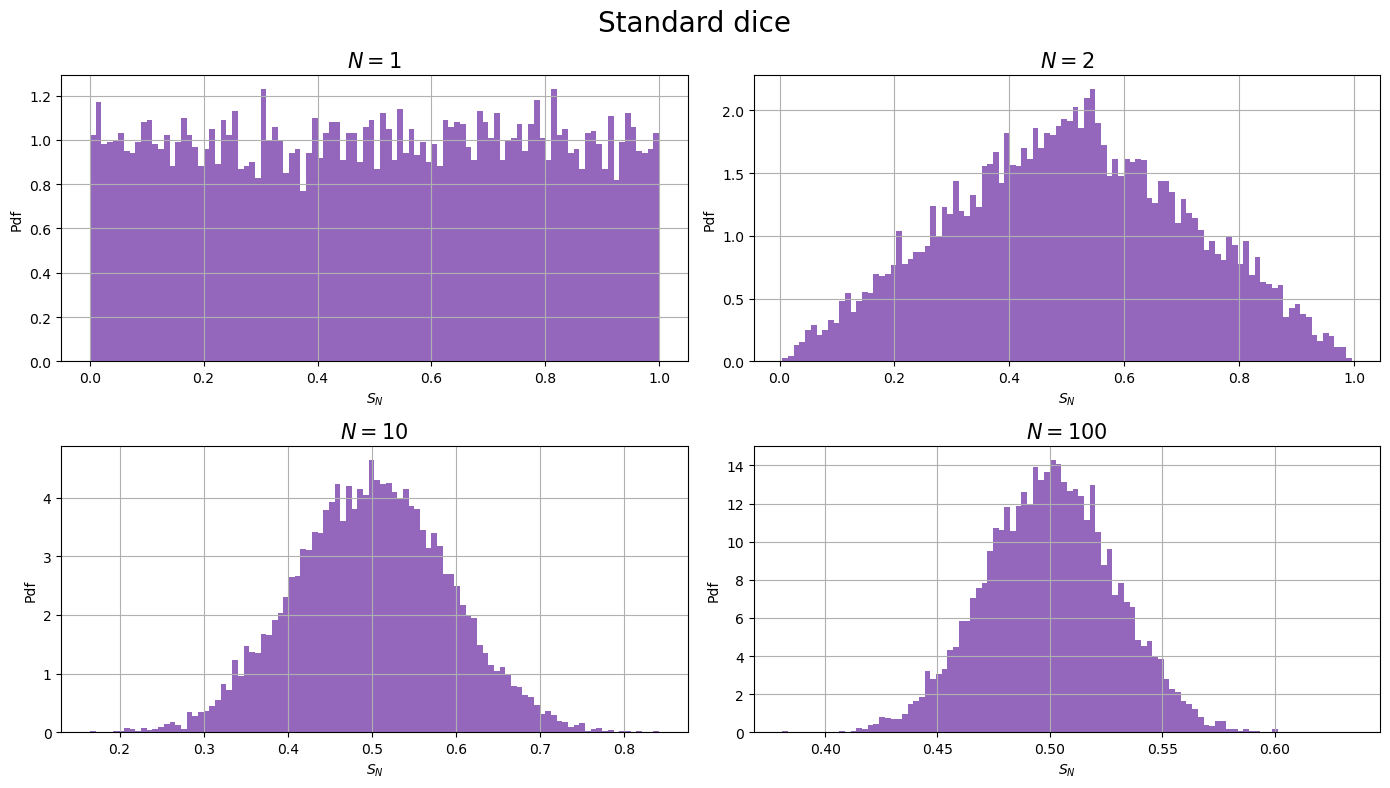

In [7]:
S_n1, S_n2, S_n3, S_n4= np.loadtxt("./1.2/standardDice.txt")

fig=plt.figure(figsize=(14, 8))
fig.suptitle('Standard dice', fontsize=20)

ax = plt.subplot(2, 2, 1)
plt.grid(True)
plt.hist(S_n1, bins=100, density=True, color='tab:purple')
plt.title("$N=1$", fontsize=15)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")

ax = plt.subplot(2, 2, 2)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n2, bins=100, density=True, color='tab:purple')
plt.title("$N=2$", fontsize=15)

ax = plt.subplot(2, 2, 3)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n3, bins=100, density=True, color='tab:purple')
plt.title("$N=10$", fontsize=15)

ax = plt.subplot(2, 2, 4)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n4, bins=100, density=True, color='tab:purple')
plt.title("$N=100$", fontsize=15)
fig.tight_layout()
plt.show()

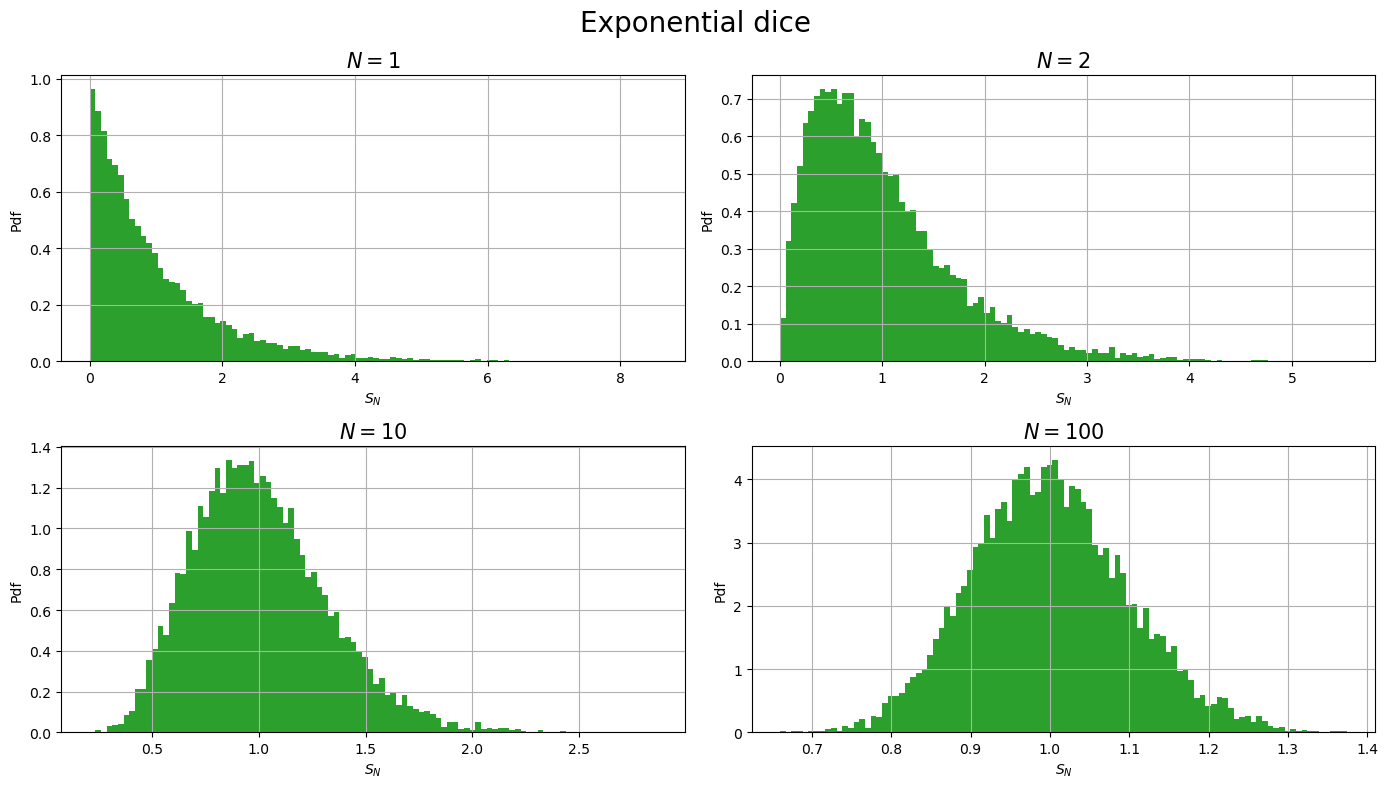

In [8]:
S_n1, S_n2, S_n3, S_n4= np.loadtxt("./1.2/exponentialDice.txt")

fig=plt.figure(figsize=(14, 8))
fig.suptitle('Exponential dice', fontsize=20)

ax = plt.subplot(2, 2, 1)
plt.grid(True)
plt.hist(S_n1, bins=100, density=True, color='tab:green')
plt.title("$N=1$", fontsize=15)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")

ax = plt.subplot(2, 2, 2)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n2, bins=100, density=True, color='tab:green')
plt.title("$N=2$", fontsize=15)

ax = plt.subplot(2, 2, 3)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n3, bins=100, density=True, color='tab:green')
plt.title("$N=10$", fontsize=15)

ax = plt.subplot(2, 2, 4)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n4, bins=100, density=True, color='tab:green')
plt.title("$N=100$", fontsize=15)
fig.tight_layout()
plt.show()

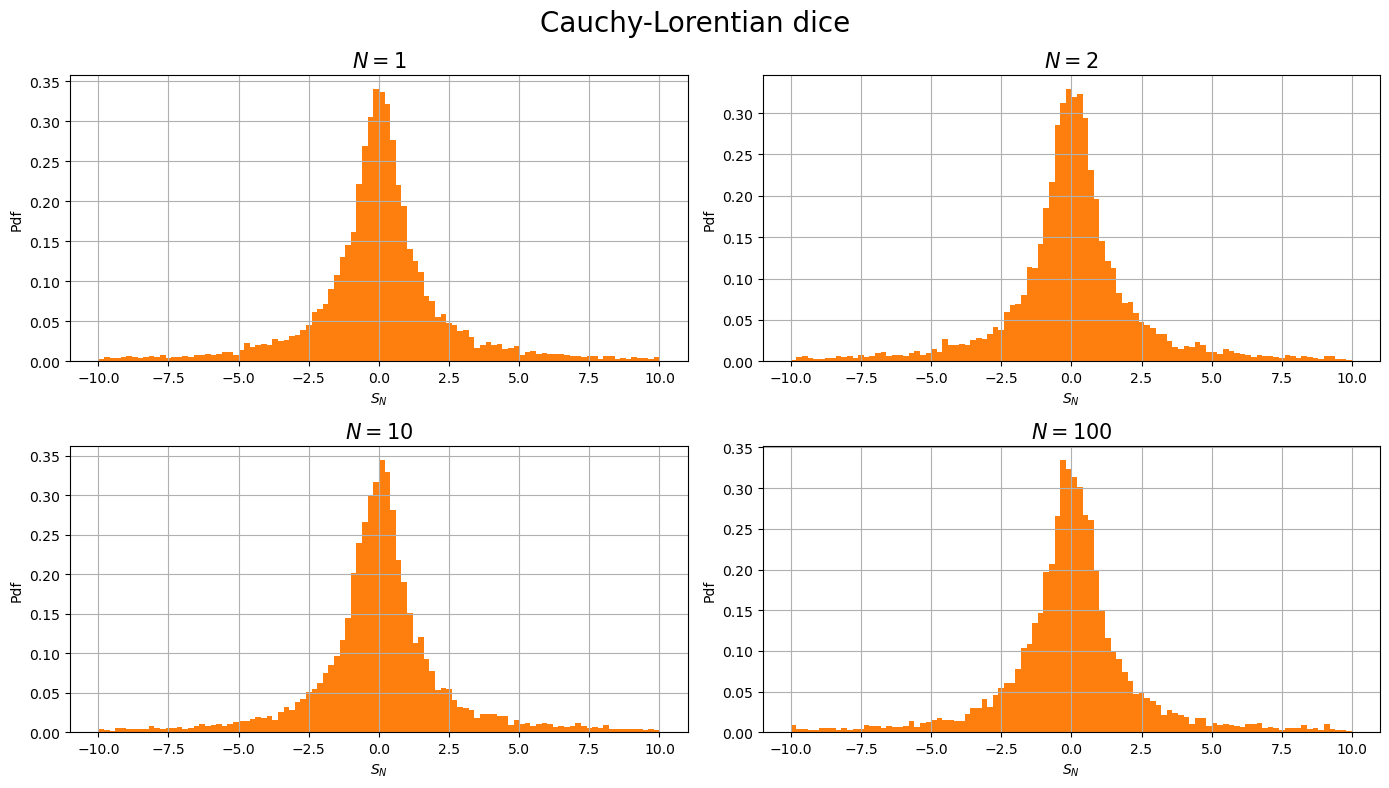

In [9]:
S_n1, S_n2, S_n3, S_n4= np.loadtxt("./1.2/lorentianDice.txt")

fig=plt.figure(figsize=(14, 8))
fig.suptitle('Cauchy-Lorentian dice', fontsize=20)

ax = plt.subplot(2, 2, 1)
plt.grid(True)
plt.hist(S_n1,bins=100, range=(-10,10), density=True, color='tab:orange')
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.title("$N=1$", fontsize=15)

ax = plt.subplot(2, 2, 2)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n2,bins=100, range=(-10,10), density=True, color='tab:orange')
plt.title("$N=2$", fontsize=15)

ax = plt.subplot(2, 2, 3)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n3,bins=100, range=(-10,10), density=True, color='tab:orange')
plt.title("$N=10$", fontsize=15)
ax = plt.subplot(2, 2, 4)

plt.grid(True)
plt.xlabel("$S_N$")
plt.ylabel("Pdf")
plt.hist(S_n4,bins=100, range=(-10,10), density=True, color='tab:orange')
plt.title("$N=100$", fontsize=15)

fig.tight_layout()
plt.show()

Since the first two examples satisfy the hypotesis of the CLT (finite variance, i.i.d) those are expected to fit a normal distribution, especially for N=100. Conversely, the Cauchy-Lorentz distribution is a stable distribution, therefore it fits another cauchy.

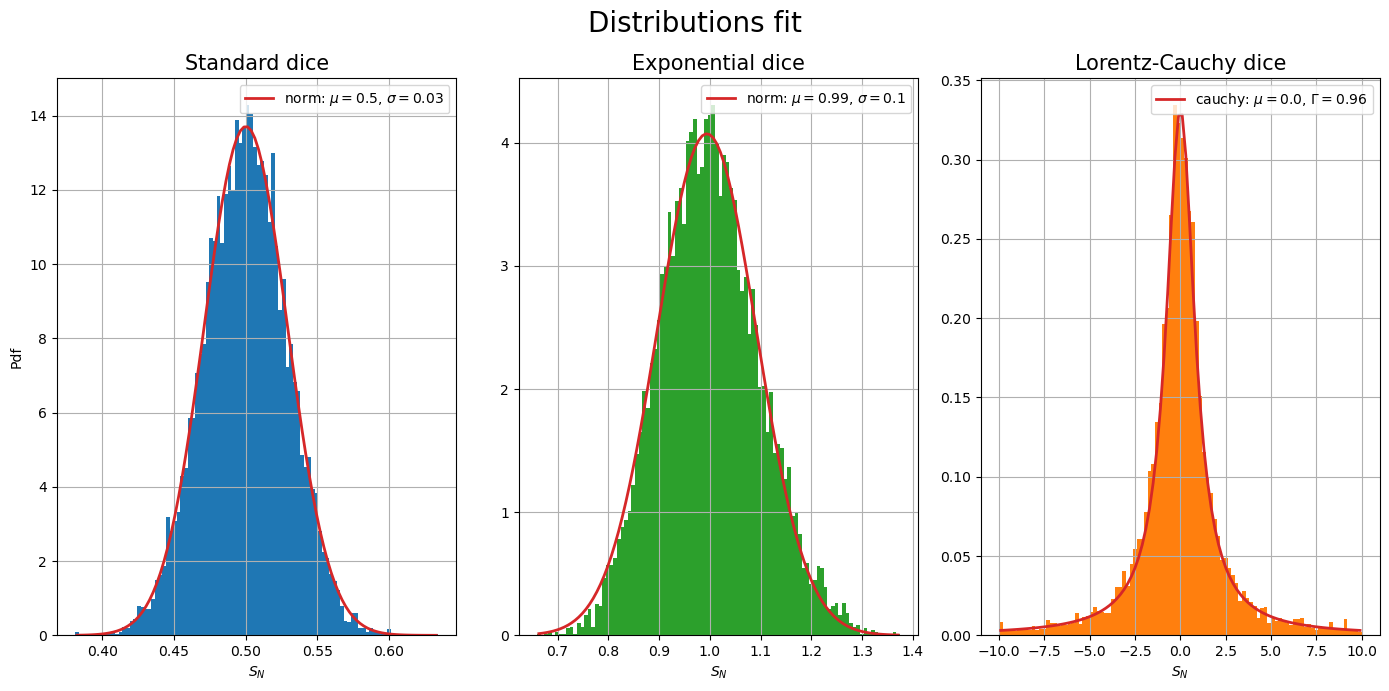

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy
from scipy.optimize import curve_fit

def fit_gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def fit_cauchy(x, gamma, x0):
    return cauchy.pdf(x, x0, gamma)

# Load data
S = np.loadtxt("./1.2/standardDice.txt")
standardDice = S[3]
S = np.loadtxt("./1.2/exponentialDice.txt")
exponentialDice = S[3]
S = np.loadtxt("./1.2/lorentianDice.txt")
lorentianDice = S[3]

# Plot histograms
fig=plt.figure(figsize=(14, 7))
fig.suptitle('Distributions fit', fontsize=20)

ax = plt.subplot(1, 3, 1)
plt.hist(standardDice, bins=100, density=True, color='tab:blue')
plt.title('Standard dice', fontsize=15)

ax = plt.subplot(1, 3, 2)
plt.hist(exponentialDice, bins=100, density=True, color='tab:green')
plt.title('Exponential dice', fontsize=15)

ax = plt.subplot(1, 3, 3)
plt.hist(lorentianDice, bins=100,range=(-10,10), density=True, color='tab:orange')
plt.title('Lorentz-Cauchy dice', fontsize=15)

# Fit distributions
hist, bins = np.histogram(standardDice, bins=100, density=True)
x_std = bins[:-1] + np.diff(bins) / 2
popt_std, pcov_std = curve_fit(fit_gaussian, x_std, hist)

hist, bins = np.histogram(exponentialDice, bins=100, density=True)
x_exp = bins[:-1] + np.diff(bins) / 2
popt_exp, pcov_exp = curve_fit(fit_gaussian, x_exp, hist)

hist, bins = np.histogram(lorentianDice, bins=100, range=(-10,10), density=True)
x_lor = bins[:-1] + np.diff(bins) / 2
popt_lor, pcov_lor = curve_fit(fit_cauchy, x_lor, hist)

# Plot fits
ax = plt.subplot(1, 3, 1)
plt.plot(x_std, fit_gaussian(x_std, *popt_std), color='tab:red', lw=2, label=f'norm: $\mu=${round(popt_std[0],2)}, $\sigma=${round(popt_std[1],2)}')
plt.legend()
plt.grid(True)
plt.xlabel('$S_N$')
plt.ylabel('Pdf')
ax = plt.subplot(1, 3, 2)
plt.plot(x_exp, fit_gaussian(x_exp, *popt_exp), color='tab:red', lw=2, label=f'norm: $\mu=${round(popt_exp[0],2)}, $\sigma=${round(popt_exp[1],2)}')
plt.legend()
plt.grid(True)
plt.xlabel('$S_N$')
ax = plt.subplot(1, 3, 3)
plt.plot(x_lor, fit_cauchy(x_lor, *popt_lor), color='tab:red', lw=2, label=f'cauchy: $\mu=${round(popt_lor[1],2)}, $\Gamma=${round(popt_lor[0],2)}')
plt.legend()
plt.grid(True)
plt.xlabel('$S_N$')

fig.tight_layout()
plt.show()

### Exercise 1.3

#### Buffon's experiment

First of all, I need to generate a random angle for the needle $\theta\in[0,\frac{\pi}{2}]$. In order to do so without explicitely using $\pi$, i generate a point of coordinates:
$$x\sim[0,1) , y\sim[0,1)$$
Then, if I want my point to be uniformly distributed in the area of $\pi/4$ i need to cout out the corrisponding square down to the unity circle, otherwise the distribution would be peaked around $\pi/4$.
So, with an if statement, i reject points that do not satisfy the condition $\sqrt{{x^2}+{y^2}}<1$. Finally, by taking $\arctan{x/y}$ I obtain the desired distribution.
Note that, since i need $sin$ projection of the needle, the interval $[0,\frac{\pi}{2}]$ is sufficient.
Second, I sample the baricenter for each needle as $bar\sim[0,d)$. 
Lastly, if the needle touches the upper band, namely if $bar + (l/2)\cdot\sin{\theta}$, or the lower one ($bar + (l/2)\cdot\sin{\theta}$), I update the success counter. I estimate the probability as the number of successes over the number of tries in the limit of a large number of tries.
More specifically, I used:`l=1`, `d=1.5`, `N_repetitions= 10 000 000`, `N_blocks= 200`

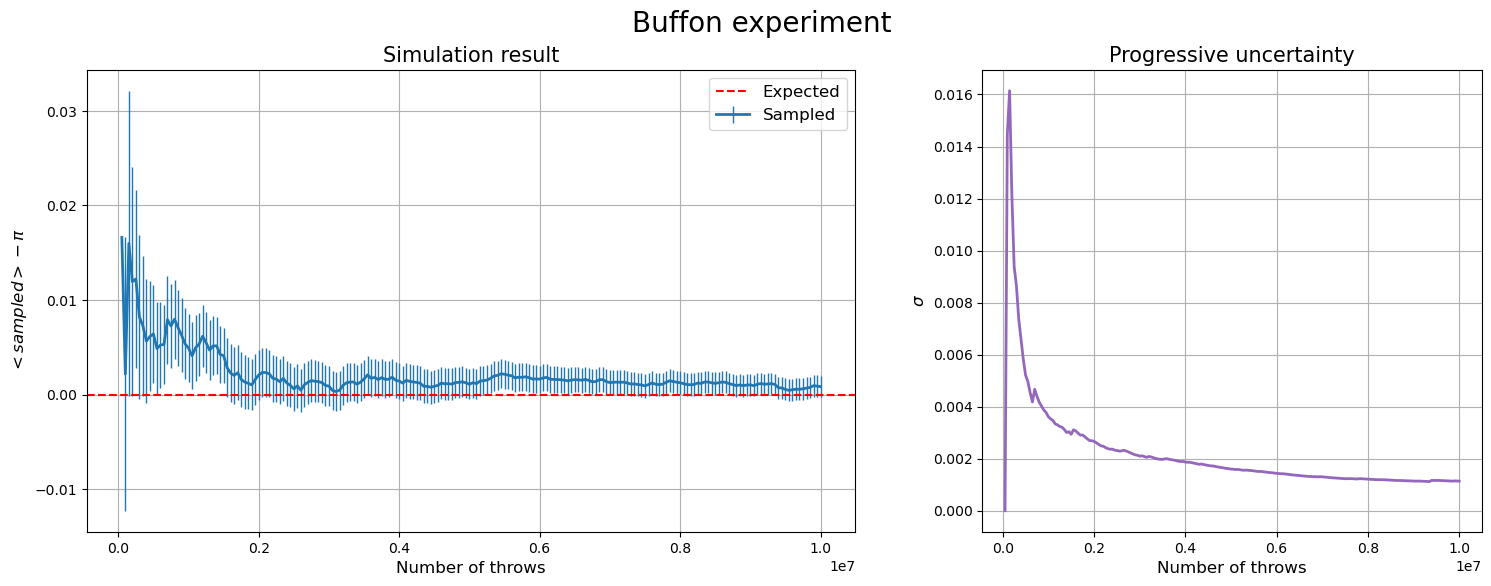

In [11]:
buffon = np.loadtxt("./1.3/buffon.txt",usecols=(0,1))
progressive_average = buffon[:, 0]
progressive_error = buffon[:,1]
x=np.arange(50000,10000010, 50000)

fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [2, 1.3]}, figsize=(18,6))
fig.suptitle('Buffon experiment', fontsize = 20)

axs[0].errorbar(x, progressive_average-np.pi, yerr=progressive_error,lw=2,elinewidth=1, label='Sampled', c='tab:blue')
axs[0].grid(True)
axs[0].axhline(0, ls='--', c='red', label='Expected')
axs[0].set_xlabel('Number of throws', fontsize=12)
axs[0].set_ylabel('$<sampled>-\pi$', fontsize=12)
axs[0].legend(fontsize=12)
axs[0].set_title('Simulation result', fontsize=15)

axs[1].plot(x, progressive_error,lw=2, c='tab:purple')
axs[1].grid(True)
axs[1].set_xlabel('Number of throws', fontsize=12)
axs[1].set_ylabel('$\sigma$', fontsize=12)
axs[1].set_title('Progressive uncertainty', fontsize=15)

plt.show()